<a href="https://colab.research.google.com/github/7Rafid/DL-project/blob/master/CNN1_fasionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:

classes = {0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

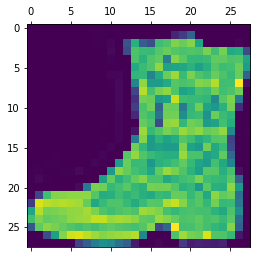

In [ ]:
plt.matshow(x_train[150])

In [ ]:
classes[y_train[15]]

'Ankle boot'

In [ ]:
# (batch, width, height, channels)
x_train = x_train.reshape((x_train.shape[0], 28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), strides = (2,2), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy',optimizer=Adam(), metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

In [ ]:
trained_history = model.fit(x_train,y_train, batch_size=1000, epochs=150, validation_data=(x_test,y_test), callbacks=callback)

Epoch 1/150
60/60 [==============================] - 12s 11ms/step - loss: 4.4552 - accuracy: 0.1033 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 2/150
60/60 [==============================] - 0s 8ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/150
60/60 [==============================] - 0s 8ms/step - loss: 2.2091 - accuracy: 0.1509 - val_loss: 2.0253 - val_accuracy: 0.2210
Epoch 4/150
60/60 [==============================] - 0s 8ms/step - loss: 1.9239 - accuracy: 0.2537 - val_loss: 1.7818 - val_accuracy: 0.3047
Epoch 5/150
60/60 [==============================] - 0s 8ms/step - loss: 1.7700 - accuracy: 0.3063 - val_loss: 1.7063 - val_accuracy: 0.3344
Epoch 6/150
60/60 [==============================] - 0s 8ms/step - loss: 1.7060 - accuracy: 0.3339 - val_loss: 1.6659 - val_accuracy: 0.3468
Epoch 7/150
60/60 [==============================] - 0s 8ms/step - loss: 1.6635 - accuracy: 0.3511 - val_loss: 1.6257 - val_accuracy: 0.3595
Epoch 8/150

In [ ]:
hist = trained_history.history


Text(0, 0.5, 'loss')

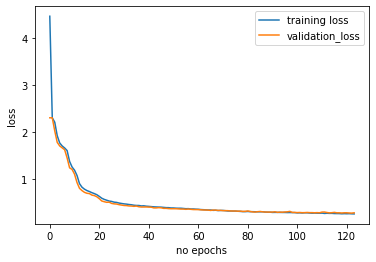

In [ ]:
plt.plot(hist['loss'], label='training loss')
plt.plot(hist['val_loss'], label='validation_loss')
plt.legend()
plt.xlabel('no epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

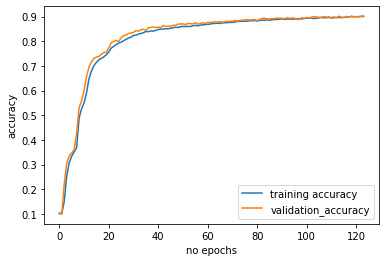

In [ ]:
plt.plot(hist['accuracy'], label='training accuracy')
plt.plot(hist['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.xlabel('no epochs')
plt.ylabel('accuracy')

In [ ]:
model.predict(x_test[9999].reshape(1,28,28,1))

array([[1.4823806e-04, 2.2978787e-12, 3.6286042e-06, 1.0481805e-07,
        8.6339005e-11, 9.3035418e-01, 2.2860606e-06, 4.5053281e-02,
        2.3955930e-02, 4.8234497e-04]], dtype=float32)

In [ ]:
pred_index = np.argmax(model.predict(x_test[9999].reshape(1,28,28,1)))

In [ ]:
pred_index

5

In [ ]:
classes[pred_index]

'Sandal'

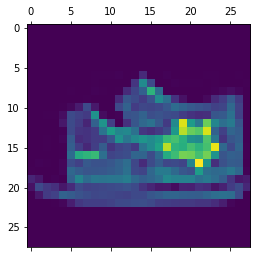

In [ ]:
plt.matshow(x_test[9999].reshape(28,28))